In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import timeit
from datetime import datetime

%load_ext tensorboard

In [3]:
# data -> model (seq,func) -> loss function, optimize (compile) -> training (run) -> gradients, variables update -> evluate test data
# Simple linear regression

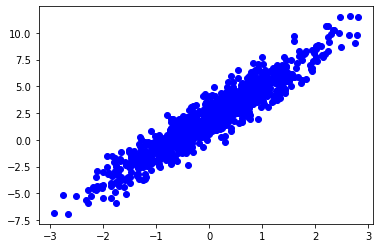

In [4]:
# data 
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise
# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

In [6]:
# model
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    #self.w = tf.Variable(5.0)
    #self.b = tf.Variable(0.0)
    self.w = tf.Variable(tf.random.normal([1]), name='w')
    self.b = tf.Variable(0.0, name='b')

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)


Variables: (<tf.Variable 'b:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'w:0' shape=(1,) dtype=float32, numpy=array([-0.6810153], dtype=float32)>)


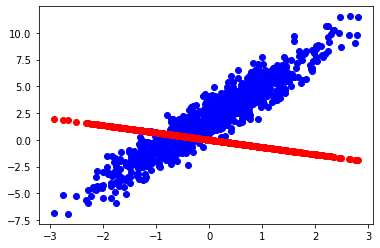

Current loss: 17.577959


In [7]:
# loss function
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

In [8]:
# training loop
# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [12]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(100)

# Define a training loop
def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=-0.64 b=0.00, loss=17.26942
Epoch  0: W=0.04 b=0.40, loss=11.68777
Epoch  1: W=0.59 b=0.72, loss=8.02354
Epoch  2: W=1.04 b=0.98, loss=5.61739
Epoch  3: W=1.40 b=1.18, loss=4.03695
Epoch  4: W=1.70 b=1.35, loss=2.99858
Epoch  5: W=1.94 b=1.48, loss=2.31618
Epoch  6: W=2.13 b=1.58, loss=1.86761
Epoch  7: W=2.29 b=1.67, loss=1.57266
Epoch  8: W=2.42 b=1.73, loss=1.37868
Epoch  9: W=2.53 b=1.79, loss=1.25107
Epoch 10: W=2.62 b=1.83, loss=1.16711
Epoch 11: W=2.69 b=1.86, loss=1.11184
Epoch 12: W=2.74 b=1.89, loss=1.07546
Epoch 13: W=2.79 b=1.91, loss=1.05151
Epoch 14: W=2.83 b=1.93, loss=1.03573
Epoch 15: W=2.86 b=1.94, loss=1.02534
Epoch 16: W=2.89 b=1.95, loss=1.01849
Epoch 17: W=2.91 b=1.96, loss=1.01398
Epoch 18: W=2.92 b=1.97, loss=1.01100
Epoch 19: W=2.94 b=1.98, loss=1.00904
Epoch 20: W=2.95 b=1.98, loss=1.00775
Epoch 21: W=2.96 b=1.98, loss=1.00690
Epoch 22: W=2.96 b=1.99, loss=1.00634
Epoch 23: W=2.97 b=1.99, loss=1.00596
Epoch 24: W=2.97 b=1.99, loss=1.00572
Epoch 25:

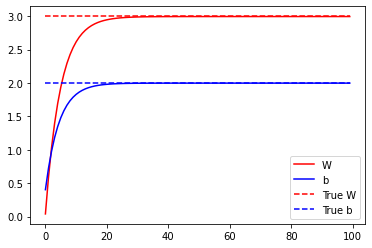

In [13]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model, x, y)

# Plot it
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

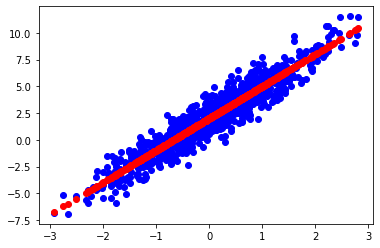

Current loss: 1.005243


In [14]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())


In [33]:
# same solution but with keras
# model
class MyModelKeras(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # Initialize the weights to `5.0` and the bias to `0.0`
        # In practice, these should be randomly initialized
        #self.w = tf.Variable(5.0)
        #self.b = tf.Variable(0.0)
        self.w = tf.Variable(tf.random.normal([1]), name='w')
        self.b = tf.Variable(0.0, name='b')

    def __call__(self, x,**kwargs):
        return self.w * x + self.b

keras_model = MyModelKeras()

# Reuse the training loop with a Keras model
training_loop(keras_model, x, y)

# You can also save a checkpoint using Keras's built-in support
keras_model.save_weights("my_checkpoint")


Epoch  0: W=2.09 b=0.40, loss=4.33455
Epoch  1: W=2.26 b=0.72, loss=3.15112
Epoch  2: W=2.39 b=0.98, loss=2.38864
Epoch  3: W=2.51 b=1.18, loss=1.89728
Epoch  4: W=2.60 b=1.35, loss=1.58057
Epoch  5: W=2.67 b=1.48, loss=1.37639
Epoch  6: W=2.73 b=1.58, loss=1.24472
Epoch  7: W=2.78 b=1.66, loss=1.15980
Epoch  8: W=2.82 b=1.73, loss=1.10502
Epoch  9: W=2.85 b=1.78, loss=1.06967
Epoch 10: W=2.88 b=1.83, loss=1.04686
Epoch 11: W=2.90 b=1.86, loss=1.03213
Epoch 12: W=2.92 b=1.89, loss=1.02261
Epoch 13: W=2.93 b=1.91, loss=1.01647
Epoch 14: W=2.94 b=1.93, loss=1.01250
Epoch 15: W=2.95 b=1.94, loss=1.00994
Epoch 16: W=2.96 b=1.95, loss=1.00828
Epoch 17: W=2.97 b=1.96, loss=1.00721
Epoch 18: W=2.97 b=1.97, loss=1.00652
Epoch 19: W=2.98 b=1.98, loss=1.00607
Epoch 20: W=2.98 b=1.98, loss=1.00578
Epoch 21: W=2.98 b=1.98, loss=1.00559
Epoch 22: W=2.99 b=1.99, loss=1.00547
Epoch 23: W=2.99 b=1.99, loss=1.00539
Epoch 24: W=2.99 b=1.99, loss=1.00534
Epoch 25: W=2.99 b=1.99, loss=1.00530
Epoch 26: W=

In [34]:
# shortcut using built-in keras features
keras_model = MyModelKeras()

# compile sets the training paramaeters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.mean_squared_error,
)

In [35]:
# keras fit expects batched data or complete dataset as NumPy array which later byy default gets chopped to batch size of 32
print(x.shape[0])
keras_model.fit(x, y, epochs=100, batch_size=1000)


1000
Epoch 1/100
1/1 [==============================] - 0s 8ms/step - loss: 20.1138
Epoch 2/100
1/1 [==============================] - 0s 0s/step - loss: 13.5735
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 9.2738
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 6.4463
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 4.5865
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 3.3630
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 2.5578
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 2.0278
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1.6789
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 1.4491
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 1.2978
Epoch 12/100
1/1 [==============================] - 0s 998us/step - loss: 1.1981
Epoch 13/100
1/1 [==============================] - 0s 0